In [1322]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [1323]:
df=pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [1324]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [1325]:
df.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [1326]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [1327]:
df['Ram']=df['Ram'].astype('int')
df['Weight'] = df['Weight'].astype('float')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [1328]:
df['x_length']=df['ScreenResolution'].apply(lambda x:x.split()[-1])
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
# df['Touchscreen']



In [1329]:
df['len']=df.x_length.apply(lambda x:x.split('x')[0]).astype('int')
df['width']=df.x_length.apply(lambda x:x.split('x')[1]).astype('int')
df=df.drop(['x_length','ScreenResolution'],axis=1)
df.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,len,width
0,0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600
1,1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900
2,2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080
3,3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800
4,4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600


In [1330]:
# df.info()
df.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [1331]:
df['PPI']=((df['len']**2)+(df['width']**2))**0.5/(df['Inches']).astype('float')
df.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,len,width,PPI
0,0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005
1,1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940
2,2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998
3,3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624
4,4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005


In [1332]:
df=df.drop('Inches',axis=1)
df.head()

,Unnamed: 0,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,len,width,PPI
0,0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005
1,1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940
2,2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998
3,3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624
4,4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005


In [1333]:
df['Cpuname'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[:3]))
df['Cpuname'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'Intel Atom x5-Z8350',
       'AMD E-Series E2-9000e', 'Intel Atom x5-Z8300',
       'AMD E-Series E2-6110', 'AMD A6-Series 9220', 'Intel Celeron Dual',
       'AMD Ryzen 1700', 'Intel Pentium Quad', 'Intel Atom x5-Z8550',
       'AMD FX 9830P', 'AMD E-Series 6110', 'Intel Xeon E3-1505M',
       'AMD E-Series 9000e', 'AMD A10-Series A10-9620P',
       'AMD A6-Series A6-9220', 'AMD A10-Series 9600P',
       'AMD A8-Series 7410', 'AMD A12-Series 9720P', 'Intel Celeron Quad',
       'AMD Ryzen 1600', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Samsung Cortex A72&A53',
       'AMD E-Series 9000', 'AMD A9-Series 9410'], dtype=object)

In [1334]:
def processor(t):
    if t.split()[0]=='Intel':
        return 'Intel'
    elif t.split()[0]=='AMD':
        return 'AMD'
    else:
        return 'Other'
df['Cpuname'] =df['Cpuname'].apply(processor)

In [1335]:
df.head()

,Unnamed: 0,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,len,width,PPI,Cpuname
0,0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel
1,1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel
2,2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel
3,3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel
4,4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel


In [1336]:
# df.dtypes
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [1337]:
df['new_memory']=df['Memory'].apply(lambda x:x.split('+'))
df['mm']=df['new_memory'].apply(lambda x:x[0])
df['mm1']=df['new_memory'].apply(lambda x:x[-1])
# print(df['new_memory'][21])
# print(df['mm'][21])
# print(df['mm1'][21])
df['new_memory']

0                 [128GB SSD]
1       [128GB Flash Storage]
2                 [256GB SSD]
3                 [512GB SSD]
4                 [256GB SSD]
                ...          
1298              [128GB SSD]
1299              [512GB SSD]
1300     [64GB Flash Storage]
1301                [1TB HDD]
1302              [500GB HDD]
Name: new_memory, Length: 1303, dtype: object

In [1338]:
df['mm'] = df['mm'].str.replace(r'\s+', ' ', regex=True)
df['mm1'] = df['mm1'].str.replace(r'\s+', ' ', regex=True)


In [1339]:
df.mm.value_counts()

mm
256GB SSD              412
1TB HDD                223
500GB HDD              132
512GB SSD              118
128GB SSD               96
256GB SSD               88
128GB SSD               76
32GB Flash Storage      38
512GB SSD               20
2TB HDD                 16
64GB Flash Storage      15
1TB SSD                 14
1.0TB Hybrid             9
256GB Flash Storage      8
16GB Flash Storage       7
32GB SSD                 6
180GB SSD                5
128GB Flash Storage      4
16GB SSD                 3
1TB SSD                  2
512GB Flash Storage      2
128GB HDD                1
508GB Hybrid             1
8GB SSD                  1
240GB SSD                1
64GB Flash Storage       1
32GB HDD                 1
1TB HDD                  1
64GB SSD                 1
1.0TB HDD                1
Name: count, dtype: int64

In [1340]:
df.mm1.value_counts()

mm1
256GB SSD              412
1TB HDD                223
 1TB HDD               185
500GB HDD              132
512GB SSD              118
128GB SSD               76
32GB Flash Storage      38
2TB HDD                 16
 2TB HDD                15
64GB Flash Storage      15
1TB SSD                 14
1.0TB Hybrid             9
256GB Flash Storage      8
16GB Flash Storage       7
32GB SSD                 6
180GB SSD                5
128GB Flash Storage      4
16GB SSD                 3
 256GB SSD               3
 500GB HDD               2
512GB Flash Storage      2
 1.0TB Hybrid            2
 512GB SSD               1
64GB SSD                 1
32GB HDD                 1
128GB HDD                1
240GB SSD                1
8GB SSD                  1
508GB Hybrid             1
1.0TB HDD                1
Name: count, dtype: int64

In [1341]:
a=[]
b=[]
c=[]
d=[]

# for i,j in enumerate(df['mm']):
    
    
#     k=j.split()
    
    
#     if k[1]=='SSD':
#         a[i]=k[0]
#     elif k[1]=='HDD':
#         b[i]=k[0]
#     elif k[1]=='Hybrid':
#         c[i]=k[0]
#     elif k[1]=='Flash':
#         d[i]=k[0]
# print(len(a),len(b),len(c),len(d))
# a+=[0]*(1303-len(a))
a = []
b = []
c = []
d = []

for j in df['mm']:
    k = j.split()
    
    if k[1] == 'SSD':
        a.append(k[0])
    else:
        a.append(0)
    
    if k[1] == 'HDD':
        b.append(k[0])
    else:
        b.append(0)
    
    if k[1] == 'Hybrid':
        c.append(k[0])
    else:
        c.append(0)
    
    if k[1] == 'Flash':
        d.append(k[0])
    else:
        d.append(0)


In [1342]:


df['SSD'] = a
df['HDD'] = b 
df['Hybrid'] = c 
df['Flash'] =  d 



In [1343]:
df.head()

,Unnamed: 0,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,width,PPI,Cpuname,new_memory,mm,mm1,SSD,HDD,Hybrid,Flash
0,0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,1600,226.983005,Intel,[128GB SSD],128GB SSD,128GB SSD,128GB,0,0,0
1,1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,900,127.677940,Intel,[128GB Flash Storage],128GB Flash Storage,128GB Flash Storage,0,0,0,128GB
2,2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,1080,141.211998,Intel,[256GB SSD],256GB SSD,256GB SSD,256GB,0,0,0
3,3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,1800,220.534624,Intel,[512GB SSD],512GB SSD,512GB SSD,512GB,0,0,0
4,4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,1600,226.983005,Intel,[256GB SSD],256GB SSD,256GB SSD,256GB,0,0,0


In [1344]:
df.isnull().sum()

Unnamed: 0     0
Company        0
TypeName       0
Cpu            0
Ram            0
Memory         0
Gpu            0
OpSys          0
Weight         0
Price          0
Touchscreen    0
len            0
width          0
PPI            0
Cpuname        0
new_memory     0
mm             0
mm1            0
SSD            0
HDD            0
Hybrid         0
Flash          0
dtype: int64

In [1345]:
df.dtypes

Unnamed: 0       int64
Company         object
TypeName        object
Cpu             object
Ram              int32
Memory          object
Gpu             object
OpSys           object
Weight         float64
Price          float64
Touchscreen      int64
len              int32
width            int32
PPI            float64
Cpuname         object
new_memory      object
mm              object
mm1             object
SSD             object
HDD             object
Hybrid          object
Flash           object
dtype: object

In [1346]:
df=df.drop(['mm','mm1','Unnamed: 0','new_memory'],axis='columns')

In [1347]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,len,width,PPI,Cpuname,SSD,HDD,Hybrid,Flash
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel,128GB,0,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel,0,0,0,128GB
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel,256GB,0,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel,512GB,0,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel,256GB,0,0,0


In [1348]:
df.dtypes

Company         object
TypeName        object
Cpu             object
Ram              int32
Memory          object
Gpu             object
OpSys           object
Weight         float64
Price          float64
Touchscreen      int64
len              int32
width            int32
PPI            float64
Cpuname         object
SSD             object
HDD             object
Hybrid          object
Flash           object
dtype: object

In [1349]:
df['SSD'] = df['SSD'].str.replace('GB', '')
df['HDD'] = df['HDD'].str.replace('GB', '')
df['Hybrid'] = df['Hybrid'].str.replace('TB', '').str.replace('GB', '')
df['Flash'] = df['Flash'].str.replace('GB', '')
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,len,width,PPI,Cpuname,SSD,HDD,Hybrid,Flash
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel,128,NaN,NaN,NaN
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel,NaN,NaN,NaN,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel,256,NaN,NaN,NaN
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel,512,NaN,NaN,NaN
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel,256,NaN,NaN,NaN


In [1350]:
df['SSD'] = pd.to_numeric(df['SSD'], errors='coerce')
df['HDD'] = pd.to_numeric(df['HDD'], errors='coerce')
df['Flash'] = pd.to_numeric(df['Flash'], errors='coerce')
# Convert 'Hybrid' column to float, replacing non-numeric values with NaN
df['Hybrid'] = pd.to_numeric(df['Hybrid'], errors='coerce')

In [1351]:
df=df.fillna(0)

In [1352]:
df.dtypes

Company         object
TypeName        object
Cpu             object
Ram              int32
Memory          object
Gpu             object
OpSys           object
Weight         float64
Price          float64
Touchscreen      int64
len              int32
width            int32
PPI            float64
Cpuname         object
SSD            float64
HDD            float64
Hybrid         float64
Flash          float64
dtype: object

In [1353]:
df.isnull().sum()

Company        0
TypeName       0
Cpu            0
Ram            0
Memory         0
Gpu            0
OpSys          0
Weight         0
Price          0
Touchscreen    0
len            0
width          0
PPI            0
Cpuname        0
SSD            0
HDD            0
Hybrid         0
Flash          0
dtype: int64

In [1354]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,len,width,PPI,Cpuname,SSD,HDD,Hybrid,Flash
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel,128.0,0.0,0.0,0.0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel,0.0,0.0,0.0,128.0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel,256.0,0.0,0.0,0.0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel,512.0,0.0,0.0,0.0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel,256.0,0.0,0.0,0.0


In [1355]:
df.drop(columns=['Memory','Hybrid','Flash'],inplace=True)

In [1356]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,len,width,PPI,Cpuname,SSD,HDD
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel,128.0,0.0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel,0.0,0.0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel,256.0,0.0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel,512.0,0.0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel,256.0,0.0


In [1357]:
# df.Gpu.unique()
df['Gpu_brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [1358]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,len,width,PPI,Cpuname,SSD,HDD,Gpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel,128.0,0.0,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel,0.0,0.0,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel,256.0,0.0,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel,512.0,0.0,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel,256.0,0.0,Intel


In [1359]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [1360]:
df=df[df['Gpu_brand']!='ARM']
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,len,width,PPI,Cpuname,SSD,HDD,Gpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel,128.0,0.0,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel,0.0,0.0,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel,256.0,0.0,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel,512.0,0.0,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel,256.0,0.0,Intel


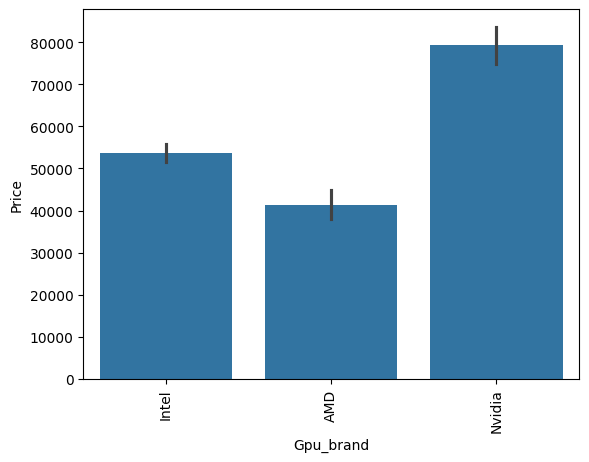

In [1361]:
sn.barplot(x=df['Gpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [1362]:
df.drop(columns=['Gpu'],inplace=True)

In [1363]:
df.head()

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,Touchscreen,len,width,PPI,Cpuname,SSD,HDD,Gpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel,128.0,0.0,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel,0.0,0.0,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel,256.0,0.0,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel,512.0,0.0,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel,256.0,0.0,Intel


In [1364]:
df.OpSys.value_counts()


OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [1365]:
df.OpSys.values

array(['macOS', 'macOS', 'No OS', ..., 'Windows 10', 'Windows 10',
       'Windows 10'], dtype=object)

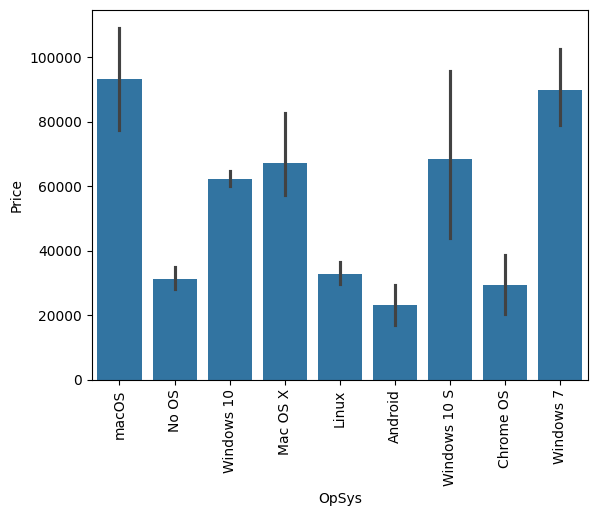

In [1366]:
sn.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [1367]:
def os(t):
    if t=='Windows 10' or t=='Windows 7' or t=='Windows 10 S':
        return 'Windows'
    elif t=='macOS' or t=='Mac OS':
        return 'Mac'
    else:
        return 'Other'

In [1368]:
df['os']=df['OpSys'].apply(os)

In [1369]:
df.head()

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,Touchscreen,len,width,PPI,Cpuname,SSD,HDD,Gpu_brand,os
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel,128.0,0.0,Intel,Mac
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel,0.0,0.0,Intel,Mac
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel,256.0,0.0,Intel,Other
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel,512.0,0.0,AMD,Mac
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel,256.0,0.0,Intel,Mac


In [1370]:
df.drop(columns=['OpSys','Cpu'],inplace=True)

In [1371]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,len,width,PPI,Cpuname,SSD,HDD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,2560,1600,226.983005,Intel,128.0,0.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,1440,900,127.677940,Intel,0.0,0.0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,1920,1080,141.211998,Intel,256.0,0.0,Intel,Other
3,Apple,Ultrabook,16,1.83,135195.3360,0,2880,1800,220.534624,Intel,512.0,0.0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,2560,1600,226.983005,Intel,256.0,0.0,Intel,Mac


In [1405]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR,SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,StandardScaler,MaxAbsScaler,MinMaxScaler,OneHotEncoder
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

In [1406]:
step1=ColumnTransformer(transformers=[
    
    ('tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])# price ko hatake count karna hai col index
],remainder='passthrough')
step2=LinearRegression()

pipe=Pipeline([
    ('step1',step1),
     ('step2',step2)
]) 
pipe.fit(x_train,y_train)



x=df.drop('Price',axis='columns')
y=df.Price
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
pred=pipe.predict(x_test)
pipe.score(x_test,y_test)

C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.7231191384051208

In [1407]:
step1=ColumnTransformer(transformers=[
    
    ('tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])# price ko hatake count karna hai col index
],remainder='passthrough')
# step2=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
step2=RandomForestRegressor(n_estimators=100)
pipe=Pipeline([
    ('step1',step1),
     ('step2',step2)
]) 
pipe.fit(x_train,y_train)



x=df.drop('Price',axis='columns')
y=df.Price
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
pred=pipe.predict(x_test)
pipe.score(x_test,y_test)


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8126319606421526

In [1394]:
step1=ColumnTransformer(transformers=[
    
    ('tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])# price ko hatake count karna hai col index
],remainder='passthrough')
step2=DecisionTreeRegressor()# can give max_depth as input

pipe=Pipeline([
    ('step1',step1),
     ('step2',step2)
]) 
pipe.fit(x_train,y_train)



x=df.drop('Price',axis='columns')
y=df.Price
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
pred=pipe.predict(x_test)
pipe.score(x_test,y_test)


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.7022628204151542

In [1408]:
step1=ColumnTransformer(transformers=[
    
    ('tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])# price ko hatake count karna hai col index
],remainder='passthrough')
step2=XGBRegressor()

pipe=Pipeline([
    ('step1',step1),
     ('step2',step2)
]) 
pipe.fit(x_train,y_train)



x=df.drop('Price',axis='columns')
y=df.Price
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
pred=pipe.predict(x_test)
pipe.score(x_test,y_test)


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8318778562507194

In [1392]:
step1=ColumnTransformer(transformers=[
    
    ('tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])# price ko hatake count karna hai col index
],remainder='passthrough')
step2=KNeighborsRegressor(n_neighbors=3)

pipe=Pipeline([
    ('step1',step1),
     ('step2',step2)
]) 
pipe.fit(x_train,y_train)



x=df.drop('Price',axis='columns')
y=df.Price
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
pred=pipe.predict(x_test)
pipe.score(x_test,y_test)


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


0.7346884695486413

In [1409]:
step1=ColumnTransformer(transformers=[
    
    ('tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])# price ko hatake count karna hai col index
],remainder='passthrough')
step2=RandomForestRegressor(n_estimators=10)

pipe=Pipeline([
    ('step1',step1),
     ('step2',step2)
]) 
pipe.fit(x_train,y_train)



x=df.drop('Price',axis='columns')
y=df.Price
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
pred=pipe.predict(x_test)
pipe.score(x_test,y_test)


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.80986443408977

In [1412]:
step1=ColumnTransformer(transformers=[
    
    ('tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])# price ko hatake count karna hai col index
],remainder='passthrough')
step2= AdaBoostRegressor(n_estimators=15,
                                 learning_rate=1.0)

pipe=Pipeline([
    ('step1',step1),
     ('step2',step2)
]) 
pipe.fit(x_train,y_train)



x=df.drop('Price',axis='columns')
y=df.Price
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
pred=pipe.predict(x_test)
pipe.score(x_test,y_test)


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.6477825919335201

In [1414]:
step1=ColumnTransformer(transformers=[
    
    ('tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])# price ko hatake count karna hai col index
],remainder='passthrough')
step2= GradientBoostingRegressor(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
# step2=GradientBoostingRegressor(n_estimators=500)
pipe=Pipeline([
    ('step1',step1),
     ('step2',step2)
]) 
pipe.fit(x_train,y_train)



x=df.drop('Price',axis='columns')
y=df.Price
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
pred=pipe.predict(x_test)
pipe.score(x_test,y_test)


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8118899846381371

In [1418]:
step1=ColumnTransformer(transformers=[
    
    ('tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])# price ko hatake count karna hai col index
],remainder='passthrough')
# step2=XGBRegressor()# can give max_depth as input
step2=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
pipe=Pipeline([
    ('step1',step1),
     ('step2',step2)
]) 
pipe.fit(x_train,y_train)



x=df.drop('Price',axis='columns')
y=df.Price
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
pred=pipe.predict(x_test)
pipe.score(x_test,y_test)


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: continuous is not supported